### **Q.2**
The differnce between the two histograms is that the number of weight parameters have been reduced. This is due to the dropout layer. Some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0.5, 0.5)])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1,784)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)
        
        return x

In [ ]:
model = Classifier()
filter = model.conv1.weight.data.numpy()
filter = (1/(2*3.69201088))*filter + 0.5
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
epochs = 40
acc_values=[]
total_step=len(trainloader)
Loss_f1=[]

for e in range(epochs):
  correct=0
  running_loss = 0
  for images, labels in trainloader:
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()

    predictions = torch.max(log_ps,1)[1]
    correct+=(predictions==labels).sum().cpu().numpy()
    acc = 100*correct/len(trainloader.dataset)
    acc_values.append(acc)

  print('Epoch {}  | Loss : {:.4f}'.format(e+1, running_loss / total_step),'|', 'Accuracy: {:.4f}'.format(acc))       
  print('----------------------------------------------------')
  Loss_f1.append(running_loss / total_step)

print('Finished Training')

Epoch 1  | Loss : 0.2750 | Accuracy: 89.8300
----------------------------------------------------
Epoch 2  | Loss : 0.2684 | Accuracy: 90.0883
----------------------------------------------------
Epoch 3  | Loss : 0.2616 | Accuracy: 90.2033
----------------------------------------------------
Epoch 4  | Loss : 0.2553 | Accuracy: 90.4667
----------------------------------------------------
Epoch 5  | Loss : 0.2525 | Accuracy: 90.7483
----------------------------------------------------
Epoch 6  | Loss : 0.2481 | Accuracy: 90.6700
----------------------------------------------------
Epoch 7  | Loss : 0.2437 | Accuracy: 90.9100
----------------------------------------------------
Epoch 8  | Loss : 0.2411 | Accuracy: 90.9950
----------------------------------------------------
Epoch 9  | Loss : 0.2335 | Accuracy: 91.2383
----------------------------------------------------
Epoch 10  | Loss : 0.2295 | Accuracy: 91.3067
----------------------------------------------------
Epoch 11  | Loss : 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 88 %


(array([  3.,   4.,  16.,  33.,  79., 186., 763., 181.,  13.,   2.]),
 array([-2.0456579 , -1.7403152 , -1.4349725 , -1.1296299 , -0.82428724,
        -0.51894456, -0.2136019 ,  0.09174076,  0.39708343,  0.7024261 ,
         1.0077688 ], dtype=float32),
 <a list of 10 Patch objects>)

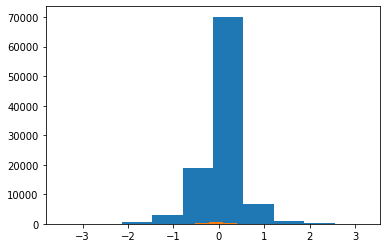

In [ ]:
import matplotlib.pyplot as plt
weights_1 = model.fc1.weight.data.flatten()
weights_2 = model.fc2.weight.data.flatten()
plt.hist(weights_1)

(array([  3.,   4.,  16.,  33.,  79., 186., 763., 181.,  13.,   2.]),
 array([-2.0456579 , -1.7403152 , -1.4349725 , -1.1296299 , -0.82428724,
        -0.51894456, -0.2136019 ,  0.09174076,  0.39708343,  0.7024261 ,
         1.0077688 ], dtype=float32),
 <a list of 10 Patch objects>)

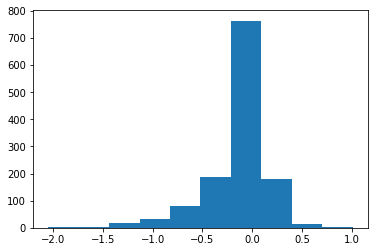

In [ ]:
plt.hist(weights_2)

In [ ]:
class Classifier2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 48)
        self.output = nn.Linear(48, 10)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = x.view(-1,784)
        x = F.relu(self.fc1(x))
        x = self.dropout(self.output(x))      

        return x

In [ ]:
model2 = Classifier2()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=5, factor=0.1, verbose=True, cooldown=10)

In [ ]:
epochs = 40
acc_values=[]

for e in range(epochs):
  correct=0
  running_loss = 0
  for images, labels in trainloader:
    log_ps = model2(images)
    loss = criterion(log_ps, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()

    predictions = torch.max(log_ps,1)[1]
    correct+=(predictions==labels).sum().cpu().numpy()
    acc = 100*correct/len(trainloader.dataset)
    acc_values.append(acc)
  print('Epoch {}  | Loss : {:.4f}'.format(e+1, running_loss / total_step),'|', 'Accuracy: {:.4f}'.format(acc))       
  print('----------------------------------------------------')

Epoch 1  | Loss : 0.5061 | Accuracy: 78.7550
----------------------------------------------------
Epoch 2  | Loss : 0.5063 | Accuracy: 78.9167
----------------------------------------------------
Epoch 3  | Loss : 0.5071 | Accuracy: 78.8500
----------------------------------------------------
Epoch 4  | Loss : 0.5010 | Accuracy: 79.3350
----------------------------------------------------
Epoch 5  | Loss : 0.4996 | Accuracy: 79.1650
----------------------------------------------------
Epoch 6  | Loss : 0.4953 | Accuracy: 79.4533
----------------------------------------------------
Epoch 7  | Loss : 0.4949 | Accuracy: 79.1900
----------------------------------------------------
Epoch 8  | Loss : 0.4952 | Accuracy: 79.2533
----------------------------------------------------
Epoch 9  | Loss : 0.4982 | Accuracy: 79.1233
----------------------------------------------------
Epoch 10  | Loss : 0.4891 | Accuracy: 79.6583
----------------------------------------------------
Epoch 11  | Loss : 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 77 %


(array([2.0000e+00, 1.8000e+01, 1.4400e+02, 1.2960e+03, 8.3430e+03,
        1.8831e+04, 7.7650e+03, 1.1220e+03, 1.0200e+02, 9.0000e+00]),
 array([-0.42712355, -0.34929103, -0.27145848, -0.19362596, -0.11579342,
        -0.03796089,  0.03987164,  0.11770418,  0.1955367 ,  0.27336925,
         0.35120177], dtype=float32),
 <a list of 10 Patch objects>)

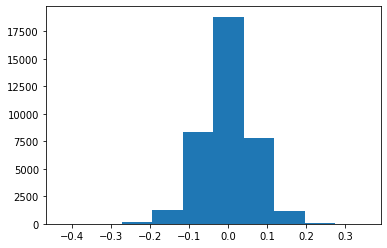

In [ ]:
import matplotlib.pyplot as plt
weights_1 = model2.fc1.weight.data.flatten()
weights_2 = model2.output.weight.data.flatten()
plt.hist(weights_1)

(array([  2.,   4.,  34.,  47.,  73., 104., 128.,  72.,  13.,   3.]),
 array([-1.0753661 , -0.8942717 , -0.7131772 , -0.53208274, -0.35098827,
        -0.1698938 ,  0.01120067,  0.19229513,  0.3733896 ,  0.55448407,
         0.73557854], dtype=float32),
 <a list of 10 Patch objects>)

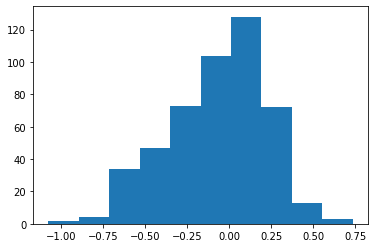

In [ ]:
plt.hist(weights_2)